## 朴素贝叶斯分类算法

Accuracy: 0.4666666666666667
Precision: 0.4666666666666667
Recall: 0.4666666666666667
F1 Score: 0.4666666666666667


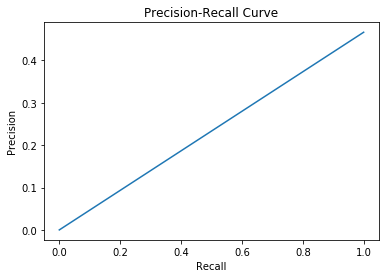

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

def separate_features_labels(dataset):
    features = dataset.iloc[:, :-1].values.tolist()
    labels = dataset.iloc[:, -1].values.tolist()
    return features, labels

def compute_prior_probabilities(labels):
    label_counts = {}
    for label in labels:
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1
    total_samples = len(labels)
    priors = {}
    for label, count in label_counts.items():
        priors[label] = count / total_samples
    return priors

def compute_conditional_probabilities(features, labels):
    conditional_probs = {}
    num_features = len(features[0])
    for feature_index in range(num_features):
        conditional_probs[feature_index] = {}
        feature_values = set([row[feature_index] for row in features])
        for value in feature_values:
            conditional_probs[feature_index][value] = {}
            for label in set(labels):
                conditional_probs[feature_index][value][label] = 0

    label_counts = {}
    for i, label in enumerate(labels):
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1
        for feature_index in range(num_features):
            value = features[i][feature_index]
            conditional_probs[feature_index][value][label] += 1

    for feature_index in range(num_features):
        for value in conditional_probs[feature_index]:
            for label in set(labels):
                count = conditional_probs[feature_index][value][label]
                total_count = label_counts[label]
                conditional_probs[feature_index][value][label] = count / total_count

    return conditional_probs

def predict_class(priors, conditional_probs, sample):
    best_label = None
    best_posterior = -1
    for label in priors:
        posterior = priors[label]
        for feature_index in range(len(sample)):
            value = sample[feature_index]
            if value in conditional_probs[feature_index]:
                posterior *= conditional_probs[feature_index][value][label]
        if posterior > best_posterior:
            best_posterior = posterior
            best_label = label
    return best_label

def evaluate_model(priors, conditional_probs, test_features, test_labels):
    true_positives = 0
    false_positives = 0
    false_negatives = 0
    for i in range(len(test_features)):
        predicted_label = predict_class(priors, conditional_probs, test_features[i])
        true_label = test_labels[i]
        if predicted_label == true_label:
            true_positives += 1
        else:
            false_positives += 1 if predicted_label != true_label else 0
            false_negatives += 1 if predicted_label != true_label else 0

    accuracy = true_positives / len(test_features)
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    f1_score = 2 * precision * recall / (precision + recall)

    return accuracy, precision, recall, f1_score

def compute_posteriors(priors, conditional_probs, sample):
    posteriors = {}
    for label in priors:
        posterior = priors[label]
        for feature_index in range(len(sample)):
            value = sample[feature_index]
            if value in conditional_probs[feature_index]:
                posterior *= conditional_probs[feature_index][value][label]
        posteriors[label] = posterior
    return posteriors

def plot_pr_curve(priors, conditional_probs, test_features, test_labels):
    thresholds = [i * 0.1 for i in range(11)]
    precision_values = []
    recall_values = []

    for threshold in thresholds:
        true_positives = 0
        false_positives = 0
        false_negatives = 0

        for i in range(len(test_features)):
            posteriors = compute_posteriors(priors, conditional_probs, test_features[i])
            predicted_label = max(posteriors, key=posteriors.get)
            true_label = test_labels[i]

            if posteriors[predicted_label] >= threshold:
                if predicted_label == true_label:
                    true_positives += 1
                else:
                    false_positives += 1
            else:
                if predicted_label != true_label:
                    false_negatives += 1

        if true_positives + false_positives > 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0

        if true_positives + false_negatives > 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0

        precision_values.append(precision)
        recall_values.append(recall)

    plt.plot(recall_values, precision_values)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

# 读取CSV文件
df = pd.read_csv('iris.csv')

# 分离特征和标签
features, labels = separate_features_labels(df)

# 划分训练集和测试集
train_ratio = 0.8
train_size = int(len(features) * train_ratio)
train_features = features[:train_size]
train_labels = labels[:train_size]
test_features = features[train_size:]
test_labels = labels[train_size:]

# 计算先验概率
priors = compute_prior_probabilities(train_labels)

# 计算条件概率
conditional_probs = compute_conditional_probabilities(train_features, train_labels)

# 评估模型
accuracy, precision, recall, f1_score = evaluate_model(priors, conditional_probs, test_features, test_labels)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

# 绘制P-R曲线
plot_pr_curve(priors, conditional_probs, test_features, test_labels)

## KNN分类算法

Epoch 1: Accuracy = 1.0000
Epoch 2: Accuracy = 1.0000
Epoch 3: Accuracy = 1.0000
Epoch 4: Accuracy = 1.0000
Epoch 5: Accuracy = 1.0000
Epoch 6: Accuracy = 1.0000
Epoch 7: Accuracy = 1.0000
Epoch 8: Accuracy = 1.0000
Epoch 9: Accuracy = 1.0000
Epoch 10: Accuracy = 1.0000


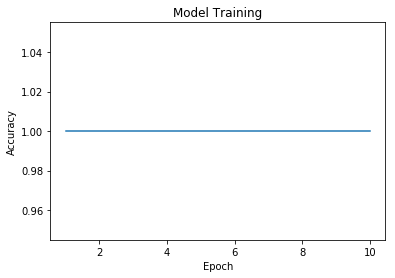

Accuracy: 1.0


In [17]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from collections import Counter

def separate_features_labels(dataset):
    features = dataset.iloc[:, :-1].values.tolist()
    labels = dataset.iloc[:, -1].values.tolist()
    return features, labels

def compute_distance(instance1, instance2):
    distance = 0
    for i in range(len(instance1)):
        distance += math.pow((instance1[i] - instance2[i]), 2)
    return math.sqrt(distance)

def get_neighbors(train_features, train_labels, test_instance, k):
    distances = []
    for i in range(len(train_features)):
        dist = compute_distance(train_features[i], test_instance)
        distances.append((train_features[i], train_labels[i], dist))
    distances.sort(key=lambda x: x[2])
    neighbors = []
    for i in range(k):
        neighbors.append((distances[i][0], distances[i][1]))
    return neighbors

def predict_class(neighbors):
    votes = Counter([neighbor[1] for neighbor in neighbors])
    return votes.most_common(1)[0][0]

def evaluate_model(train_features, train_labels, test_features, test_labels, k):
    correct_predictions = 0
    predictions = []
    for i in range(len(test_features)):
        neighbors = get_neighbors(train_features, train_labels, test_features[i], k)
        predicted_label = predict_class(neighbors)
        predictions.append(predicted_label)

        if predicted_label == test_labels[i]:
            correct_predictions += 1

    accuracy = correct_predictions / len(test_features)

    return accuracy, predictions

# 读取CSV文件
df = pd.read_csv('iris.csv')

# 分离特征和标签
features, labels = separate_features_labels(df)

# 划分训练集和测试集
train_ratio = 0.8
train_size = int(len(features) * train_ratio)
train_features = features[:train_size]
train_labels = labels[:train_size]
test_features = features[train_size:]
test_labels = labels[train_size:]

# 选择K值
k = 3

# 初始化准确率列表
accuracies = []

# 模型训练
for epoch in range(10):
    accuracy, _ = evaluate_model(train_features, train_labels, train_features, train_labels, k)
    accuracies.append(accuracy)

    print(f"Epoch {epoch+1}: Accuracy = {accuracy:.4f}")

# 绘制准确率曲线
plt.plot(range(1, 11), accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Training')
plt.show()

# 评估模型
accuracy, predictions = evaluate_model(train_features, train_labels, test_features, test_labels, k)

print("Accuracy:", accuracy)

# 绘制P-R曲线
# 在KNN算法中，精确率和召回率的计算方法与二分类问题不同，无法直接绘制P-R曲线


### sklearn实现KNN

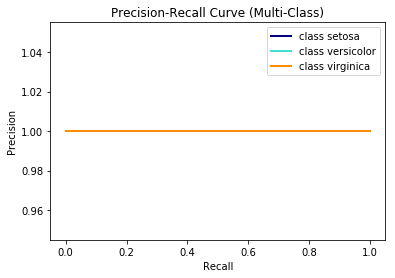

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from itertools import cycle

# 读取CSV文件
df = pd.read_csv('iris.csv')

# 分离特征和标签
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# 划分训练集和测试集
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

# 创建KNN分类器对象
knn = KNeighborsClassifier(n_neighbors=3)

# 在训练集上训练KNN模型
knn.fit(train_features, train_labels)

# 在测试集上进行预测
predictions = knn.predict(test_features)

# 获取每个类别的预测概率
probas = knn.predict_proba(test_features)

# 计算每个类别的精确率和召回率
precision = dict()
recall = dict()
n_classes = len(knn.classes_)
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(test_labels.apply(lambda x: 1 if x == knn.classes_[i] else 0), probas[:, i])

# 绘制P-R曲线
plt.figure()
colors = cycle(['navy', 'turquoise', 'darkorange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2, label='class {}'.format(knn.classes_[i]))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Multi-Class)')
plt.legend(loc='best')
plt.show()


In [23]:
import numpy as np
import pandas as pd
import math
from collections import Counter

import matplotlib.pyplot as plt

# 读取数据集
def Data():
    iris=pd.read_csv('iris_net.csv')
    return iris

# 划分数据集
def Datasets(iris):
    index=np.random.permutation(len(iris))
    index=index[0:15]
    Test = iris.take(index)
    Train = iris.drop(index)
    datasets = [Test, Train]

    return datasets

# KNN算法
def KNN(Train, Test, GT, k):
    Train_num = Train.shape[0]
    tests = np.tile(Test, (Train_num, 1)) - Train
    distance = (tests ** 2) ** 0.5
    result = distance.sum(axis=1)
    results = result.argsort()
    label = []
    for i in range(k):
        label.append(GT[results[i]])
    return label

def cross_define_K(Train, Test, GT):
    precision = []

    for k in range(1,50):
        #print(k)
        true = 0
        for i in Test:
            Test1 = [i[0],i[1],i[2],i[3]]
            result = KNN(Train,Test1,GT,k)
            collection = Counter(result)
            result = collection.most_common(1)
            if result[0][0] == i[4]:
                true += 1
        success = true / len(Test)
        precision.append(success)

    k1 = range(1,50)
    plt.plot(k1,precision,label='line1',color='g',marker='.',markerfacecolor='pink',markersize=10)
    plt.xlabel('K')
    plt.ylabel('Precision')
    plt.title('KNN')
    plt.legend()
    plt.show()


if __name__ == "__main__":
    # 读取iris数据集
    iris = Data()
    # 对数据集进行划分（训练集，测试集）
    datasets = Datasets(iris)

    print(datasets[0])

    # 设置KNN的k值
    k = 3

    # 将训练集的GT隐去
    Train = datasets[1].drop(columns=['class']).values

    # 读取训练集的GT
    GT = datasets[1]['class'].values

    # 读取测试集
    Test = datasets[0].values

    cross_define_K(Train,Test,GT)

    true = 0
    for i in Test:
        Test = [i[0],i[1],i[2],i[3]]
        result = KNN(Train,Test,GT,k)

        # KNN返回的是测试数据与训练数据相近的n个预测值
        collection = Counter(result)
        result = collection.most_common(1)
        #print(result[0][0])

        # 选取其中出现最多的结果进行验证
        if result[0][0] == i[4]:
            true += 1

    success = true/len(datasets[0])
    print('success：\n',success)





     Unnamed: 0  sepal.Length  sepal.Width  setal.Length  petal.Width  \
10           10           5.4          3.7           1.5          0.2   
74           74           6.4          2.9           4.3          1.3   
84           84           5.4          3.0           4.5          1.5   
144         144           6.7          3.3           5.7          2.5   
42           42           4.4          3.2           1.3          0.2   
22           22           4.6          3.6           1.0          0.2   
137         137           6.4          3.1           5.5          1.8   
36           36           5.5          3.5           1.3          0.2   
41           41           4.5          2.3           1.3          0.3   
88           88           5.6          3.0           4.1          1.3   
44           44           5.1          3.8           1.9          0.4   
32           32           5.2          4.1           1.5          0.1   
58           58           6.6          2.9         

ValueError: operands could not be broadcast together with shapes (135,4) (135,5) 

训练集特征 shape: (120, 4)
训练集标签 shape: (120,)
测试集特征 shape: (30, 4)
测试集标签 shape: (30,)
开始模型训练...
模型训练完成!
模型的分类结果: [0 0 1 0 0 0 0 0 0 0 0 1 2 2 1 2 1 1 0 1 1 2 2 0 2 1 1 2 0 0]
真实的分类结果: [0 0 1 0 0 0 0 0 0 0 0 1 2 2 1 2 1 1 0 1 1 2 2 0 2 1 1 1 0 0]
模型的准确率: 0.9666666666666667


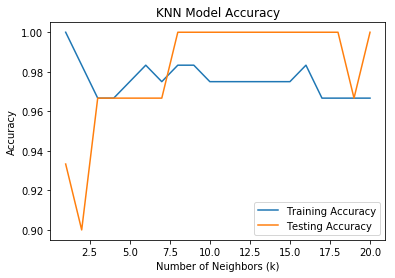

In [30]:
import sklearn.datasets as datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

iris = datasets.load_iris()

feature = iris['data']
target = iris['target']

x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=2021)

print("训练集特征 shape:", x_train.shape)
print("训练集标签 shape:", y_train.shape)
print("测试集特征 shape:", x_test.shape)
print("测试集标签 shape:", y_test.shape)

knn = KNeighborsClassifier(n_neighbors=3)

print("开始模型训练...")
knn.fit(x_train, y_train)
print("模型训练完成!")

y_pred = knn.predict(x_test)
y_true = y_test

print('模型的分类结果:', y_pred)
print('真实的分类结果:', y_true)

accuracy = knn.score(x_test, y_test)
print('模型的准确率:', accuracy)

# 可视化精确度曲线
train_accs = []
test_accs = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_acc = knn.score(x_train, y_train)
    test_acc = knn.score(x_test, y_test)
    train_accs.append(train_acc)
    test_accs.append(test_acc)

plt.plot(k_values, train_accs, label='Training Accuracy')
plt.plot(k_values, test_accs, label='Testing Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Model Accuracy')
plt.legend()
# plt.show()
plt.savefig("不同k值下的准确率.jpg")

训练集特征 shape: (120, 4)
训练集标签 shape: (120,)
测试集特征 shape: (30, 4)
测试集标签 shape: (30,)
开始模型训练...
模型训练完成!
模型的分类结果: [0 0 1 0 0 0 0 0 0 0 0 1 2 2 1 2 1 1 0 1 1 2 2 0 2 1 1 2 0 0]
真实的分类结果: [0 0 1 0 0 0 0 0 0 0 0 1 2 2 1 2 1 1 0 1 1 2 2 0 2 1 1 1 0 0]
模型的准确率: 0.9666666666666667

分类报告:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.90      0.95        10
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30


混淆矩阵:
[[14  0  0]
 [ 0  9  1]
 [ 0  0  6]]


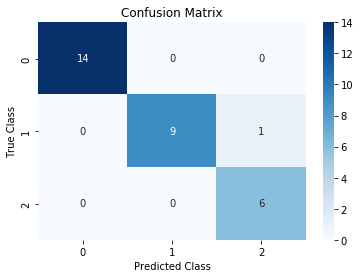

In [33]:
import sklearn.datasets as datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

iris = datasets.load_iris()

feature = iris['data']
target = iris['target']

x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=2021)

print("训练集特征 shape:", x_train.shape)
print("训练集标签 shape:", y_train.shape)
print("测试集特征 shape:", x_test.shape)
print("测试集标签 shape:", y_test.shape)

knn = KNeighborsClassifier(n_neighbors=3)

print("开始模型训练...")
knn.fit(x_train, y_train)
print("模型训练完成!")

y_pred = knn.predict(x_test)
y_true = y_test

print('模型的分类结果:', y_pred)
print('真实的分类结果:', y_true)

accuracy = knn.score(x_test, y_test)
print('模型的准确率:', accuracy)

# 计算并打印分类报告
print("\n分类报告:")
print(classification_report(y_true, y_pred))

# 计算混淆矩阵
cm = confusion_matrix(y_true, y_pred)
print("\n混淆矩阵:")
print(cm)

# 可视化混淆矩阵
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
# plt.show()
plt.savefig("confusion_mate_KNN.jpg")

训练集特征 shape: (120, 4)
训练集标签 shape: (120,)
测试集特征 shape: (30, 4)
测试集标签 shape: (30,)
开始模型训练...
模型训练完成!
模型的分类结果: [0 0 1 0 0 0 0 0 0 0 0 1 2 2 1 2 1 1 0 1 1 2 2 0 2 1 1 2 0 0]
真实的分类结果: [0 0 1 0 0 0 0 0 0 0 0 1 2 2 1 2 1 1 0 1 1 2 2 0 2 1 1 1 0 0]


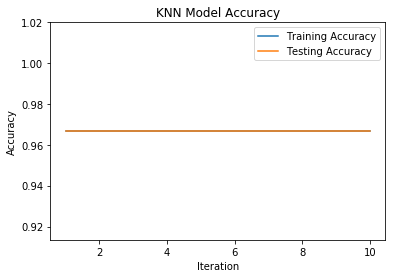

In [35]:
import sklearn.datasets as datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

iris = datasets.load_iris()

feature = iris['data']
target = iris['target']

x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=2021)

print("训练集特征 shape:", x_train.shape)
print("训练集标签 shape:", y_train.shape)
print("测试集特征 shape:", x_test.shape)
print("测试集标签 shape:", y_test.shape)

knn = KNeighborsClassifier(n_neighbors=3)

print("开始模型训练...")
knn.fit(x_train, y_train)
print("模型训练完成!")

y_pred = knn.predict(x_test)
y_true = y_test

print('模型的分类结果:', y_pred)
print('真实的分类结果:', y_true)

train_accuracy = []
test_accuracy = []
iterations = 10

for i in range(iterations):
    knn.fit(x_train, y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

plt.plot(range(1, iterations+1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, iterations+1), test_accuracy, label='Testing Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('KNN Model Accuracy')
plt.legend()
plt.show()


## 逻辑回归

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True False  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True 

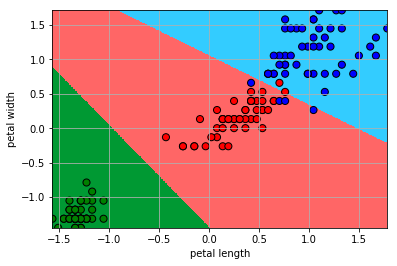

In [43]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import datasets
from sklearn import preprocessing
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
iris=datasets.load_iris()
#每行的数据，一共四列，每一列映射为feature_names中对应的值
X=iris.data
#每行数据对应的分类结果值（也就是每行数据的label值）,取值为[0,1,2]
Y=iris.target
#归一化处理
X = X[:, -2:]
X = StandardScaler().fit_transform(X)
lr = LogisticRegression()   # Logistic回归模型
lr.fit(X, Y)        # 根据数据[x,y]，计算回归参数
N, M = 500, 500     # 横纵各采样多少个值
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()   # 第0列的范围
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()   # 第1列的范围
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)                    # 生成网格采样点
x_test = np.stack((x1.flat, x2.flat), axis=1)   # 测试点

cm_light = mpl.colors.ListedColormap(['#009933', '#ff6666', '#33ccff'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
y_hat = lr.predict(x_test)       # 预测值
y_hat = y_hat.reshape(x1.shape)                 # 使之与输入的形状相同
plt.pcolormesh(x1, x2, y_hat, cmap=cm_light)     # 预测值的显示
plt.scatter(X[:, 0], X[:, 1], c=Y.ravel(), edgecolors='k', s=50, cmap=cm_dark)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
# plt.show()
plt.savefig("逻辑回归分类结果.jpg")
y_hat = lr.predict(X)
Y = Y.reshape(-1)
result = y_hat == Y
print(y_hat)
print(result)
acc = np.mean(result)
print('准确度: %.2f%%' % (100 * acc))


### 逻辑回归绘制混淆矩阵

In [ ]:
import sklearn.datasets as datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 加载鸢尾花数据集
iris = datasets.load_iris()

# 特征和标签
X = iris.data
y = iris.target

# 将数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

# 创建逻辑回归模型
logreg = LogisticRegression()

# 在训练集上训练模型
logreg.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = logreg.predict(X_test)

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 绘制混淆矩阵
labels = iris.target_names
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
# plt.show()
plt.savefig("LR混淆矩阵.jpg")

##  决策树

In [44]:
from sklearn import tree #导入树
from sklearn.tree import DecisionTreeClassifier #导入决策树分类器
from sklearn.datasets import load_iris #导入鸢尾花数据集
from sklearn.model_selection import train_test_split #分训练集测试集的类
from matplotlib import pyplot as plt #画图用的
from sklearn.model_selection import GridSearchCV #网格搜索
import pandas as pd
import graphviz #画决策树的，需要事先安装

In [45]:
iris = load_iris() #将数据集实例化，别忘了括号
Xtrain,Xtest,Ytrain,Ytest = train_test_split(iris.data,iris.target,test_size=0.3) #将鸢尾花数据的特征矩阵和标签矩阵，按7:3的比例划分训练集和测试集，0.3是可以变的，也可以填0.4，注意X，Y的顺序

In [46]:
clf = DecisionTreeClassifier() #实例化模型，括号不填criterion默认是‘gini’,也可以填criterion = 'entropy'
clf = clf.fit(Xtrain, Ytrain) #训练数据集
score = clf.score(Xtest, Ytest) #评估数据集

score #将评估结果打印出来，因为测试集和训练集划分的不同，可能每个人的结果也不同

1.0

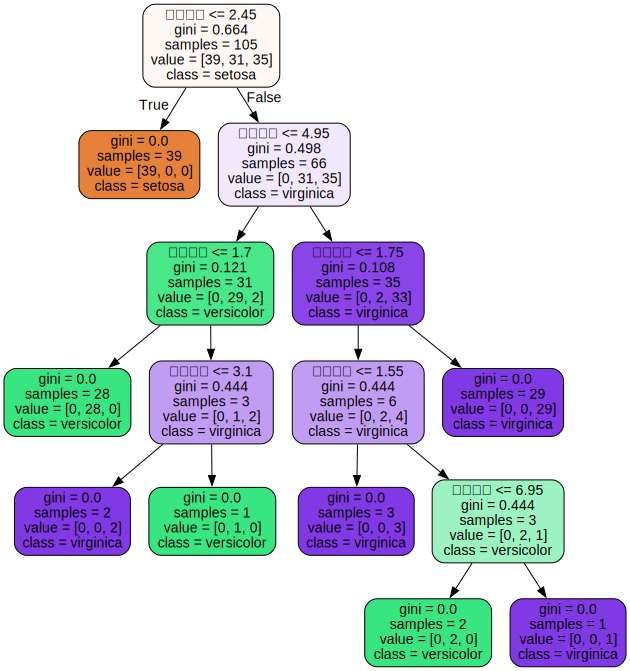

In [47]:
feature_name = ['花萼长度','花萼宽度','花瓣长度','花瓣宽度'] #定义特征的名字，方便后面的阅读
dot_data = tree.export_graphviz(clf
                                ,feature_names = feature_name
                                ,class_names=["setosa","versicolor","virginica"] #标签名字
                                ,filled=True #框框填充颜色（可以不写）
                                ,rounded=True #框框角是圆圆的（可以不写）
                                )
graph = graphviz.Source(dot_data) #导出树
graph

In [48]:
clf = tree.DecisionTreeClassifier(max_depth=2  #最大深度是2，这个也可以填3或4试试看
                                  ,min_samples_leaf=5 #下一个叶子节点大于5会进行，小于5就不会再分
                                  ,min_samples_split=10 #最小分支节点，当前样本大于10才会分
                                  ,max_features=3 #最大特征数，有一个重要程度为0
                                  )
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)

score

0.9111111111111111

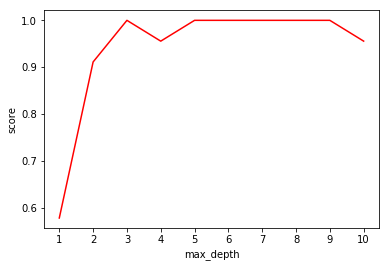

In [49]:
test=[] #定义一个列表放分数
for i in range(10):       #10次循环map_depth
    clf = tree.DecisionTreeClassifier(max_depth=i+1)
    clf = clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest,Ytest)
    test.append(score)
plt.plot(range(1,11),test,color="red") #横坐标是1-10，纵坐标是分数，颜色是红色
plt.xticks(range(1,11))#横坐标是1-10
plt.xlabel("max_depth") #横坐标标签
plt.ylabel("score") #纵坐标标签
# plt.show() #展示画好的图（由图可知当map_depth为2时分数最高）
plt.savefig("决策树损失结果.jpg")

In [50]:
parameters = {'criterion':("gini","entropy")
    ,"max_depth":[*range(1,5)] #前面我们知道这个应该是2，所以我们给定范围1-5
    ,'min_samples_split':[*range(5,40,5)]#最小分支节点以步长为5，在5-39循环
              }  #定义我们要找的参数
clf = tree.DecisionTreeClassifier()
GS = GridSearchCV(clf, parameters, cv=10) #cv=10代表交叉验证10次
GS.fit(Xtrain,Ytrain)

GS.best_params_ #打印最好的参数
GS.best_score_ #打印最好的分数

0.9318181818181819

### 绘制决策树混淆矩阵

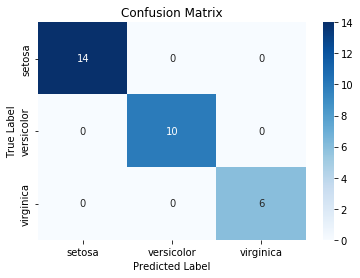

In [51]:
# 在测试集上进行预测
y_pred = logreg.predict(X_test)

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)
# 绘制混淆矩阵
labels = iris.target_names
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## SVM

D:\PyCharm2018\VirtualEnv\deepLearn\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\PyCharm2018\VirtualEnv\deepLearn\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(105, 4)
Accuracy:0.980952
(40000, 2)


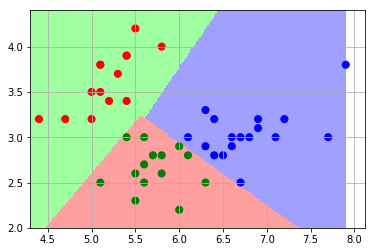

In [52]:
import numpy as np
from sklearn import model_selection as mo
from sklearn import svm
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib as mpl

def iris_type(s):
    # 数据转为整型，数据集标签类别由string转为int
    it = {b'Iris-setosa': 0, b'Iris-versicolor': 1, b'Iris-virginica': 2}
    return it[s]

data = np.loadtxt(r'iris.data', dtype=float, delimiter=',', converters={4:iris_type})
'''
def loadtxt(fname, dtype=float, comments='#', delimiter=None,
            converters=None, skiprows=0, usecols=None, unpack=False,
            ndmin=0, encoding='bytes', max_rows=None):
'''
x, y = np.split(data, (4, ), axis=1)
x_train, x_test, y_train, y_test = mo.train_test_split(x, y, random_state=1, test_size=0.3)
'''
train_data：被划分的样本特征集
train_target：被划分的样本标签
test_size：如果是浮点数，在0-1之间，表示样本占比；如果是整数的话就是样本的数量
random_state：是随机数的种子。
随机数种子：其实就是该组随机数的编号，在需要重复试验的时候，保证得到一组一样的随机数。比如你每次都填1，其他参数一样的情况下你得到的随机数组是一样的。但填0或不填，每次都会不一样。
随机数的产生取决于种子，随机数和种子之间的关系遵从以下两个规则：
种子不同，产生不同的随机数；种子相同，即使实例不同也产生相同的随机数。
'''
clf = svm.SVC(C=0.5, kernel='linear', decision_function_shape='ovr')
clf.fit(x_train, y_train, sample_weight=None)
print(x_train.shape)
#print(x_train)
#print(y_train)
#print(x_test)
#print(y_test)
acc = clf.predict(x_train) == y_train.flat
print('Accuracy:%f' % (np.mean(acc)))
x1 = x[:, :2]
x_train, x_test, y_train, y_test = mo.train_test_split(x1, y,random_state=1, test_size=0.3)
clf.fit(x_train, y_train, sample_weight=None)
x1_min, x1_max = x1[:, 0].min(), x1[:, 0].max()
x2_min, x2_max = x1[:, 1].min(), x1[:, 1].max()
x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]
g_test = np.stack((x1.flat, x2.flat), axis=1)
print(g_test.shape)
g_map = clf.predict(g_test).reshape(x1.shape)
y = clf.predict(x_test)
cm_light = colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dack = colors.ListedColormap(['r', 'g', 'b'])
plt.pcolormesh(x1, x2, g_map, cmap=cm_light)
plt.scatter(x_test[:, 0], x_test[:, 1],c=np.squeeze(y.flat), s=50, cmap=cm_dack)
plt.plot()
plt.grid()
# plt.show()
plt.savefig("SVM分类结果.jpg")

### SVM绘制混淆矩阵

(150, 4)
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
train: 1.0
test: 0.9333333333333333


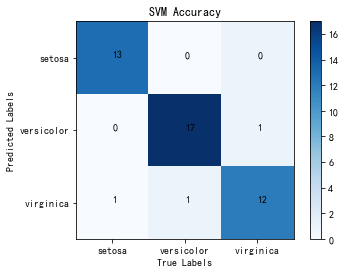

In [53]:
# 绘制iris_data混淆矩阵
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
#  load iris dataset

iris = load_iris()
n_samples, n_features = iris.data.shape
print((n_samples, n_features))
print(iris.keys())
print(iris.target)

# split train test

train_data, test_date = train_test_split(iris.data, random_state=1, train_size=0.7, test_size=0.3)
train_label, test_label = train_test_split(iris.target, random_state=1, train_size=0.7, test_size=0.3)
# create SVM

classifier = svm.SVC(C=2, kernel='rbf', gamma=10, decision_function_shape='ovr')
classifier.fit(train_data, train_label.ravel())
# predict

pre_train = classifier.predict(train_data)
pre_test = classifier.predict(test_date)

print("train:", accuracy_score(train_label, pre_train))
print("test:", accuracy_score(test_label, pre_test))

# confusion matrix

confusion= confusion_matrix(test_label, pre_test)

plt.imshow(confusion, cmap=plt.cm.Blues)

# 热度图，后面是指定的颜色块，可设置其他的不同颜色
plt.imshow(confusion, cmap=plt.cm.Blues)
# ticks 坐标轴的坐标点
# label 坐标轴标签说明
indices = range(len(confusion))
# 第一个是迭代对象，表示坐标的显示顺序，第二个参数是坐标轴显示列表
# plt.xticks(indices, [0, 1, 2])
# plt.yticks(indices, [0, 1, 2])
plt.xticks(indices, ['setosa', 'versicolor', 'virginica'])
plt.yticks(indices, ['setosa', 'versicolor', 'virginica'])

plt.colorbar()

plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('SVM Accuracy')

# plt.rcParams两行是用于解决标签不能显示汉字的问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 显示数据
for first_index in range(len(confusion)):  # 第几行
    for second_index in range(len(confusion[first_index])):  # 第几列
        plt.text(first_index, second_index, confusion[first_index][second_index])
# 在matlab里面可以对矩阵直接imagesc(confusion)

# 显示
# plt.show()
plt.savefig("SVM混淆矩阵.jpg")